## SIMULACIÓN DE MONTECARLO PARA EL GERENCIAMIENTO DE LA INCERTIDUMBRE

**Objetivo** 

Continuando con nuestra serie de artículos sobre la confiabilidad integral, utilizaremos el método de Montecarlo para determinar cuál es la expectativa de producción de un yacimiento petrolero, basado en el análisis de las variables presentadas en el ejercicio anterior, porosidad y nivel de arenas. 

Una vez hallamos caracterizado y encontrado los modelos estadísticos de las variables, procederemos a realizar la simulación de las diferentes combinaciones entre variables dentro del estudio para finalmente hallar la distribución que caracteriza el potencial de producción del yacimiento. 


**Alcance**

El presente artículo es la tercera etapa en el análisis de variables aleatorias, en este caso realizaremos simulaciones de Montecarlo teniendo y sin tener en cuenta la correlación entre las diferentes variables de estudio. Para la ejecución de esta parte utilizaremos toda Numpy, Pandas, Pyplot, Seaborn y Reliability para Python. Introduciremos un librería adicional para el análisis de sensibilidad de la varianza llamada SALib.

**Ejercicio #3 - Simulación de Montecarlo de variables independientes.**
Se requiere determinar la distribución estadística que describa correctamente el comportamiento del yacimiento de estudio, expresando correctamente la expectativa potencial de producción "POES".

Dada la complejidad de los yacimientos de hidrocarburos, la heterogeneidad en su composición fisicoquímica y las limitaciones tecnológicas resulta imposible caracterizar cada una de estas variables como simples valores puntuales; de allí que estas variables sean calificadas por los especialistas en la materia como variables aleatorias o distribuidas, ya que en las mismas convergen las fuentes fundamentales de incertidumbre como lo son el conocimiento incompleto y la heterogeneidad.

Todo lo anterior implica que el POES es en sí mismo una variable aleatoria que es función de varias variables aleatorias, cada una de las cuales puede representarse con una distribución de probabilidades (Ver ejemplo 2); cada una con su media y su desviación estándar.

En este ejemplo, se describen en detalle todas las etapas requeridas para el cálculo del POES; estas son:

Etapa 1: Caracterizar probabilísticamente las variables de entrada al modelo: A, ANP, Φ, Sw y Bo; siguiendo los procedimientos expresados en el artículo anterior.

Etapa 2: Propagar mediante la Simulación de Montecarlo la incertidumbre de A, ANP, Φ, Sw y Bo en el modelo matemático del POES, para encontrar la distribución de probabilidades del mismo.

Etapa 3: Una vez conocidas las distribuciones de probabilidades del POES se calcularán parámetros de interés como la media, la moda y los percentiles 10, 50 y 90.

### **Caracterizión probabilística de las variables de entrada al modelo: A, ANP, Φ, Sw y Bo.**

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import reliability as rel
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys
sys.path.insert(0, os.path.abspath('..\CONFIABILIDAD INTEGRAL'))
import scripts
np.random.seed(8)
%matplotlib inline

In [2]:
# Importamos la data para revisar inicialmente su homogeneidad
df = pd.read_csv("DATOS YACIMIENTOS.csv")
df.head()

,SATURACION (Sw),ARENA (ANP),POROSIDAD (F)
0,0.212,118.00,0.198
1,0.217,121.00,0.200
2,0.204,114.25,0.208
3,0.206,76.00,0.204
4,0.209,72.00,0.198


In [3]:
#Separamos la  data por variables en forma de arrays
Sw = df["SATURACION (Sw)"]
ANP = df["ARENA (ANP)"]
F = df["POROSIDAD (F)"]

Iniciamos realizando el análisis de las variables que son medidas en campo, determinando nuevamente el modelo de probabilidades que más se ajusta a su distribución. Para esto hacemos uso de la biblioteca “Reliability” específicamente.

### **Análisis del parámetro Sw - Saturación de agua.** 

In [4]:
# Analizamos la variable saturación de agua, se asume que ninguno de los datos tiene censura ni a derecha e izquierda.
rel.Fitters.Fit_Everything(np.array(Sw),show_histogram_plot=False, show_PP_plot=False, show_probability_plot=False)

                     Alpha     Beta     Gamma        Mu      Sigma   Lambda        AICc         BIC
Distribution                                                                                       
Weibull_2P        0.228274  12.4053                                         -228.564516 -225.136948
Normal_2P                                      0.219362  0.0216603          -222.580980 -219.153412
Beta_2P            72.0199  256.357                                         -217.938999 -214.511431
Gamma_2P        0.00246166  89.1113                                         -216.325416 -212.897848
Weibull_3P        0.107105  5.26461  0.119605                               -216.104609 -211.112306
Gamma_3P        0.00122846   362.85 -0.226646                               -214.026188 -209.033885
Exponential_2P                          0.125                       10.5975 -123.625551 -120.197983
Exponential_1P                                                      4.55868  -46.512242  -44.750983


Seleccionamos la distribución Weibull 2P y creamos el objeto respectivo:

In [5]:
# Creamos el objeto Weibull_Distribution con los parámetros de α y β que nos sugiere la herramienta. 
Sw_dist = rel.Distributions.Weibull_Distribution(alpha=0.228274, beta=12.4053)

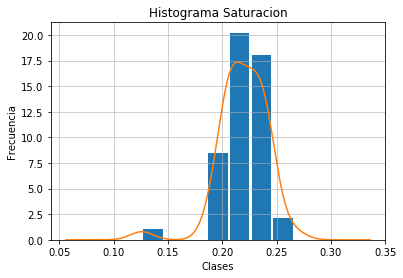

In [6]:
# Realizamos el histograma de la variable Saturación
scripts.histo_frec(Sw, "Saturacion", show_table=False)

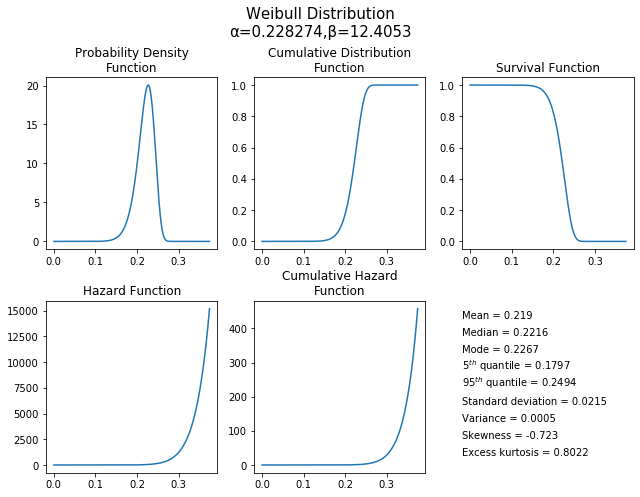

In [7]:
# Presentamos la graficas de la distribución seleccionada para la variable porosidad
Sw_dist.plot()

### **Análisis de la variable Arena Neta de producción - ANP.**

In [8]:
# Analizamos la variable Arena, se asume que ninguno de los datos tiene censura ni a derecha e izquierda
rel.Fitters.Fit_Everything(np.array(ANP),show_histogram_plot=False, show_PP_plot=False, show_probability_plot=False)

                  Alpha     Beta    Gamma       Mu     Sigma     Lambda        AICc         BIC
Distribution                                                                                   
Gamma_2P        8.86427  11.1876                                         453.395684  456.823252
Normal_2P                                  99.1702   28.9012             453.857860  457.285428
Weibull_2P      109.806  3.72404                                         454.061721  457.489289
Lognormal_2P                               4.55148  0.309264             455.177491  458.605059
Lognormal_3P                      3.08069  4.51662  0.321211             457.748934  458.605059
Gamma_3P        8.86428  11.1876        0                                455.681097  460.673400
Weibull_3P      71.2814  2.26659  35.6249                                456.771354  461.763657
Exponential_2P                     37.499                      0.016215  485.723549  489.151117
Exponential_1P                          

In [9]:
# Creamos el objeto Gamma_Distribution con los parámetros de α y β que nos sugiere la herramienta. 
ANP_dist = rel.Distributions.Gamma_Distribution(alpha=8.86427, beta=11.1876)

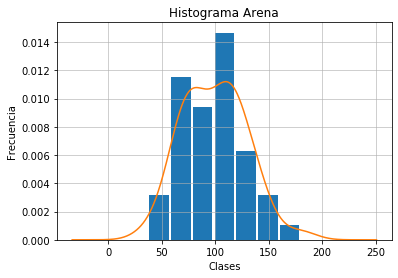

In [10]:
# Realizamos el histograma de la variable Arena
scripts.histo_frec(ANP, "Arena", show_table=False)

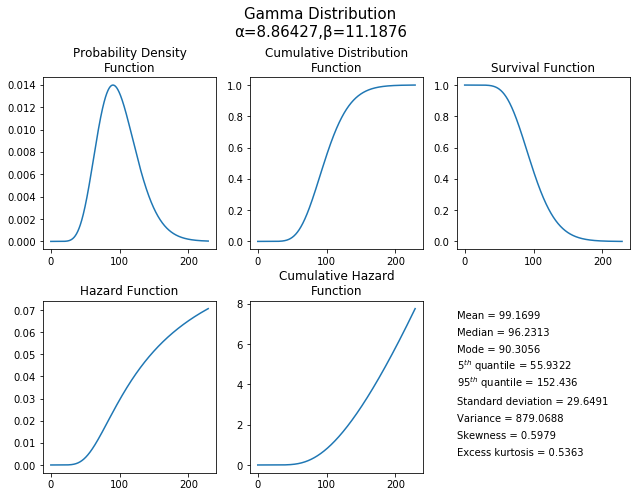

In [11]:
# Presentamos la graficas de la distribución seleccionada para la variable arena
ANP_dist.plot()

### **Análisis de la variable Porosidad - F.**

In [12]:
# Analizamos la variable Porosidad, se asume que ninguno de los datos tiene censura ni a derecha e izquierda
rel.Fitters.Fit_Everything(np.array(F),show_histogram_plot=False, show_PP_plot=False, show_probability_plot=False)

                     Alpha     Beta      Gamma        Mu     Sigma   Lambda        AICc         BIC
Distribution                                                                                       
Beta_2P            48.0931  208.708                                         -212.095910 -208.668342
Normal_2P                                       0.187277  0.024343          -211.604967 -208.177399
Weibull_3P       0.0591949  2.29094   0.134805                              -211.315611 -206.323307
Gamma_3P        0.00239848      103 -0.0597663                              -209.866961 -204.874658
Weibull_2P        0.198082  8.14332                                         -207.697305 -204.269737
Exponential_2P                           0.141                      21.6092 -190.600453 -187.172885
Gamma_2P         0.0126654  14.7864                                         -181.901417 -178.473849
Exponential_1P                                                       5.3397  -61.376963  -59.615704


In [13]:
# Creamos el objeto Normal_Distribution con los parámetros de μ y ς que nos sugiere la herramienta.
F_dist = rel.Distributions.Normal_Distribution(mu=0.187277, sigma=0.024343)

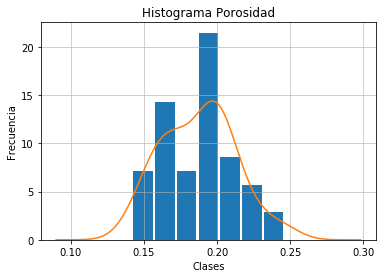

In [14]:
# Realizamos el histograma de la variable Porosidad
scripts.histo_frec(F, "Porosidad", show_table=False)

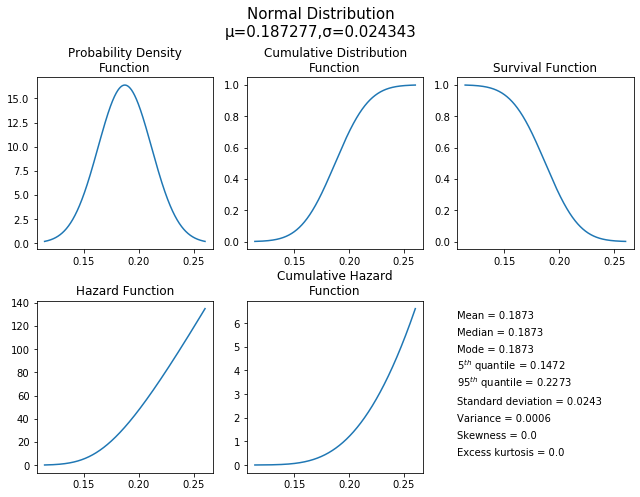

In [15]:
# Presentamos la graficas de la distribución seleccionada para la variable porosidad
F_dist.plot()

### **Caracterización probabilística del Área (A):** 

El proceso de caracterización de
esta variable involucra algunas particularidades muy importantes. En este caso, la información disponible proviene de estimaciones hechas por expertos en la materia. Esta es una muy importante fuente de información, que debe modelarse probabilísticamente de manera adecuada.

Tradicionalmente, las estimaciones de los expertos se hacen en base a tres valores; un mínimo, un máximo y un valor más probable (ubicado entre el mínimo y el máximo). Para caracterizar probabilísticamente esta información no se realizan test de calidad de ajuste; sino que se utilizan distribuciones de probabilidad especiales, diseñadas para modelar variables cuando la información que se tiene se reduce a tres estimados; un mínimo, un valor más probable y un máximo.

Para ajustar la distribución Beta PERT y uniforme se realizó un desarrollo personal para su implementación, alineado al estilo de programación de la biblioteca Reliability, con el fin de poder realizar la simulaciones necesarias de manera adecuada..


In [16]:
# Se importa la función Beta_Pert de la biblioteca personal
A_dist = scripts.Beta_Pert(2500,2961,3200)

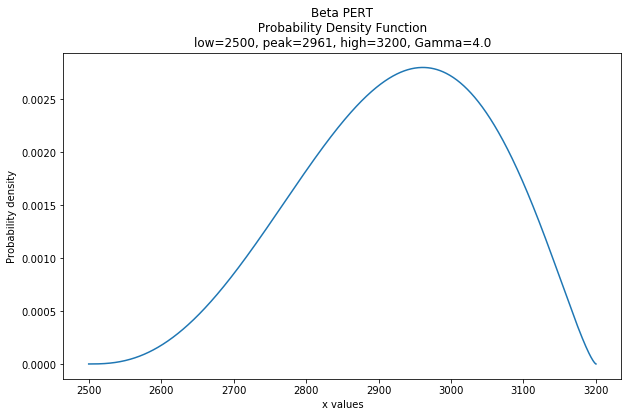

In [17]:
plt.figure(figsize=(10,6))
A_dist.PDF()

### **Caracterización probabilística de Bo:** 

Para caracterizar la variable Factor Volumétrico (Bo), se dispone, al igual que para el Área, de datos provenientes de la opinión de expertos; pero en este caso, solo se tienen dos valores, un máximo (Bomax=1,25) y un mínimo (Bomin=1,05). Esto implica que los expertos no tienen razones para pensar que hay algún valor en ese rango con mayor probabilidad de ocurrencia; es decir no pueden identificar un valor más probable. Para estos casos, se usa es la distribución uniforme.

In [18]:
# Se importa la función Uniforme de la biblioteca personal
Bo_dist = scripts.Uniform(1.05,1.25)

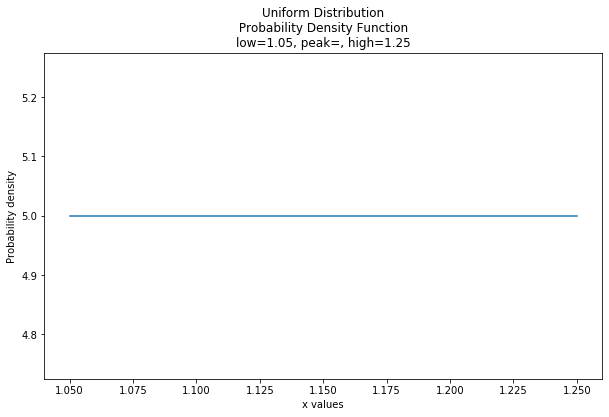

In [19]:
plt.figure(figsize=(10,6))
Bo_dist.PDF()

### Simulación de Montecarlo de variables aleatorias independientes.

Para realizar la simulación de los diferentes posibles escenarios que se pueden presentar en el resultado POES, se realiza una iteracion de 1000 puntos y se calcula el resultado de la variable. Luego procederemos a realizar la caracterización de dichos resultados y se plantea una conclusion preliminar del ejercicio.

In [20]:
#Creamos un diccionario con todas la funciones asociadas al proceso para realizar una generacion de valores aleatorios que 
# nos permita caracterizar los diferentes posibles resultados de la variable POES.
var = {"Sw":Sw_dist,"ANP":ANP_dist,"F":F_dist, "A":A_dist,"Bo":Bo_dist }

Definimos una función para simular las iteraciones necesarias que se requieran. Todas los objetos creados deben contener la función "random_sample" con el fin de generar los valores aleatorios.

In [21]:
def random_simulation(iter_num,var):
    global result_sim
    result_sim = pd.DataFrame(columns=var.keys())
    columns = list(result_sim.columns)
    for i in columns:
        result_sim[i] = var[i].random_samples(iter_num)
    return result_sim

In [22]:
# Creamos 1000 simulaciones de cada uno de los datos independientemente. 
random_simulation(1000,var)

,Sw,ANP,F,A,Bo
0,0.242034,123.965110,0.204427,2935.759824,1.108126
1,0.252291,82.796559,0.203967,2764.783836,1.102938
2,0.241721,79.141226,0.232526,2852.422147,1.238067
3,0.223205,107.823341,0.199719,2929.905709,1.125426
4,0.205094,104.139674,0.184768,2986.592490,1.193628
...,...,...,...,...,...
995,0.191298,90.924481,0.238441,3007.120215,1.181486
996,0.180365,104.480194,0.209971,3119.157988,1.194377
997,0.225778,126.666471,0.166103,2978.009644,1.126096
998,0.184572,75.853362,0.153283,2842.321086,1.220825


Creamos una columna POES donde se aplica la formula inicial con cada uno de los datos de cada fila. 

In [23]:
# Aplicación de la formula POES a las variables generadas.
result_sim["POES"] = result_sim.apply(lambda row:( (0.007758* row.A * row.ANP*row.F*(1-row.Sw))/row.Bo), axis = 1)

In [24]:
# Mostramos los 5 primeros resultados
result_sim

,Sw,ANP,F,A,Bo,POES
0,0.242034,123.965110,0.204427,2935.759824,1.108126,394.791678
1,0.252291,82.796559,0.203967,2764.783836,1.102938,245.564018
2,0.241721,79.141226,0.232526,2852.422147,1.238067,249.415713
3,0.223205,107.823341,0.199719,2929.905709,1.125426,337.851806
4,0.205094,104.139674,0.184768,2986.592490,1.193628,296.903263
...,...,...,...,...,...,...
995,0.191298,90.924481,0.238441,3007.120215,1.181486,346.196318
996,0.180365,104.480194,0.209971,3119.157988,1.194377,364.299959
997,0.225778,126.666471,0.166103,2978.009644,1.126096,334.199312
998,0.184572,75.853362,0.153283,2842.321086,1.220825,171.247365


Realizamos la caracterizacion de la variable POES con el fin de determinar cual es la distribucion probabilistica que mas se adecua a los datos. 

                  Alpha     Beta    Gamma       Mu     Sigma      Lambda          AICc           BIC
Distribution                                                                                        
Gamma_2P        29.5478  9.69552                                          11815.019504  11824.822979
Gamma_3P        32.0408  8.33794  19.3271                                 11816.363253  11831.062423
Lognormal_2P                               5.60522  0.328229              11824.243373  11834.046848
Lognormal_3P                       3.6819  5.59079  0.333233              11827.647686  11834.046848
Weibull_3P        240.5  2.42359  73.2284                                 11845.338077  11860.037247
Normal_2P                                  286.482   92.8819              11904.547160  11914.350634
Weibull_2P      319.229  3.22321                                          11909.548632  11919.352107
Exponential_2P                    76.0682                     0.00475254  12702.162478  127

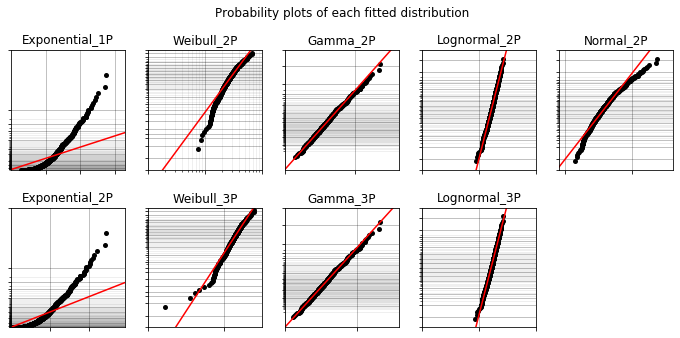

In [25]:
# Caracterizamos la variable POES
POES = result_sim["POES"]
rel.Fitters.Fit_Everything(np.array(POES), show_histogram_plot=False, show_PP_plot=False, show_probability_plot=True)

Aunque la aplicación nos recomienda utilizar una distribución Gamma 2P o 3P, utilizaremos la distribución Lognormal ya que apoyados en los gráficos de probabilidad podemos observar que existen puntos dispersos (outlainers) que estas no están cubriendo adecuadamente.

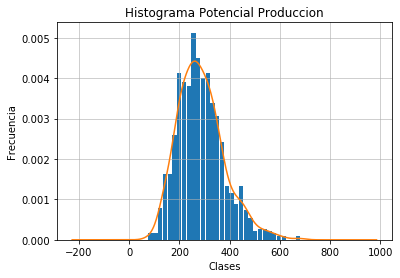

(None,
                   Clases  # Puntos  Probabilidad  Densidad
 0     (76.0692, 94.9937)         3         0.003  0.000159
 1    (94.9937, 113.9182)         3         0.003  0.000159
 2   (113.9182, 132.8427)        15         0.015  0.000793
 3   (132.8427, 151.7672)        31         0.031  0.001638
 4   (151.7672, 170.6916)        31         0.031  0.001638
 5   (170.6916, 189.6161)        49         0.049  0.002589
 6   (189.6161, 208.5406)        78         0.078  0.004122
 7   (208.5406, 227.4651)        74         0.074  0.003910
 8   (227.4651, 246.3896)        72         0.072  0.003805
 9   (246.3896, 265.3141)        97         0.097  0.005126
 10  (265.3141, 284.2386)        85         0.085  0.004492
 11  (284.2386, 303.1631)        76         0.076  0.004016
 12  (303.1631, 322.0876)        78         0.078  0.004122
 13   (322.0876, 341.012)        64         0.064  0.003382
 14   (341.012, 359.9365)        58         0.058  0.003065
 15   (359.9365, 378.861)        

In [26]:
#Realizamos la distribucion de las resultados de las simulacion. 
scripts.histo_frec(POES, "Potencial Produccion")

In [47]:
# Creamos un objeto con la distribucion Lognormal con dos parametros
POES_dist = rel.Distributions.Lognormal_Distribution(mu=5.6052,sigma=0.3282)

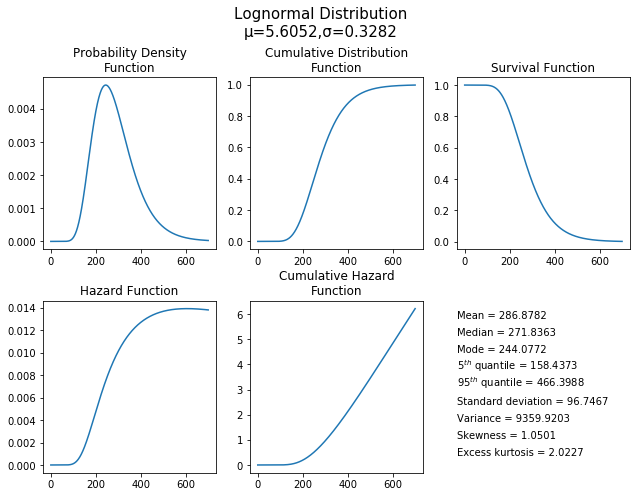

In [48]:
# Graficamos las diferentes de la funcion que describe la variable POES
POES_dist.plot()
plt.show()

### **Analisis del resultado de la caracterizacion de la variable POES.**

Como resultado podemos observar que luego de la simulación de montecarlo, encontramos que la función que mejor describe la variable compuesta POES es, una distribución lognormal de 2 parámetros mu=5.6052 y sigma=0.3282, con una expectativa de producción media de 286.87 Mbrls que variará entre 284.23–303.1631 Mbrls totales y una desviación estándar de 98.7.

### **Análisis de Sensibilidad por contribución a la varianza - cálculo POES.**

El análisis de sensibilidad permite cuantificar la contribución relativa de cada una de las variables aleatorias de entrada a un modelo, a la dispersión o varianza del resultado o variable de salida del modelo. Obviamente es un procedimiento que debe realizarse después de haber completado la propagación de incertidumbre ya sea por el Método de los Momentos o por Simulación de Montecarlo.

Este análisis es de vital importancia para “gerenciar la incertidumbre” ya que nos permite identificar las variables de entrada al modelo en las que debe centrarse la atención y tomar las acciones necesarias (compra de información, toma de datos, análisis causa raíz, etc) para mejorar el nivel de conocimiento sobre las mismas, (de ser técnicamente factible y económicamente rentable), porque solo así se logrará reducir la incertidumbre de la variable de salida.

In [29]:
result_sim.describe()

,Sw,ANP,F,A,Bo,POES
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.219149,99.742205,0.186368,2926.059709,1.148991,286.481832
std,0.021740,29.846883,0.023989,127.048485,0.057509,92.928398
min,0.127726,22.237000,0.094782,2593.169749,1.050097,76.069210
25%,0.208017,78.335132,0.170681,2838.236302,1.099215,220.518010
50%,0.222130,96.658445,0.186185,2932.197703,1.148926,276.303252
75%,0.233823,117.009182,0.202214,3021.746382,1.197451,338.092231
max,0.272260,227.331268,0.260612,3184.935162,1.249941,681.652818


Para realizar el análisis de sensibilidad utilizaremos la librería SALib bajo el método Sobol, el cual es uno de los diferentes métodos de análisis de sensibilidad. https://en.wikipedia.org/wiki/Sensitivity_analysis

In [49]:
from SALib.sample import saltelli
from SALib.analyze import sobol

In [50]:
def POES_func(Sw,ANP,F,A,Bo):
    return 7758*A*ANP*F*(1-Sw)/Bo

In [51]:
# Definimos la cantidad de iteraciones y el problema
N = 1000

problem = {
    "num_vars": 5, 
    "names": ["Sw", "ANP","F","A","Bo"], 
    "bounds": [[0.1277, 0.2722], [22.2370, 227.3312],[0.0947,0.2606],[2593.1697,3184.9351],[1.0500,1.2499]]
}

In [57]:
# Generamos la cantidad n de muestras
sample = saltelli.sample(problem, N)

In [53]:
Y = np.empty([sample.shape[0]])

In [58]:
# Evaluamos el modelo para cada punto de muestra
for i in range(len(Y)):
    x = sample[i]
    Y[i] = POES_func(x[0], x[1],x[2],x[3],x[4])

In [59]:
# Estimamos los índices de sensibilidad utilizando el método Sobol
sensitivity = sobol.analyze(problem, Y)

In [60]:
# Sensibilidad de primer orden
sensitivity["S1"]

array([0.00891778, 0.71028102, 0.21344572, 0.01035135, 0.00830179])

In [61]:
# Sensibilidad Global
sensitivity["ST"]

array([0.01108821, 0.75470111, 0.26919595, 0.0140623 , 0.01063694])

In [62]:
# Matriz de sensibilidad de segundo orden
sensitivity["S2"]

array([[        nan,  0.00176196, -0.00021261, -0.00045138, -0.00100731],
       [        nan,         nan,  0.03697833, -0.00371205, -0.00581783],
       [        nan,         nan,         nan,  0.0182354 ,  0.01784807],
       [        nan,         nan,         nan,         nan, -0.00136354],
       [        nan,         nan,         nan,         nan,         nan]])

In [63]:
# Creamos la matriz de resultados
import itertools
dictt=dict(itertools.islice(sensitivity.items(), 4))

In [64]:
result_sens =pd.DataFrame(dictt,index=["Sw", "ANP","F","A","Bo"])

In [65]:
# Presentamos el resultado de la matriz. 
result_sens

,S1,S1_conf,ST,ST_conf
Sw,0.008918,0.008636,0.011088,0.001235
ANP,0.710281,0.063477,0.754701,0.067668
F,0.213446,0.040348,0.269196,0.031897
A,0.010351,0.010386,0.014062,0.001778
Bo,0.008302,0.009173,0.010637,0.001341


<BarContainer object of 5 artists>

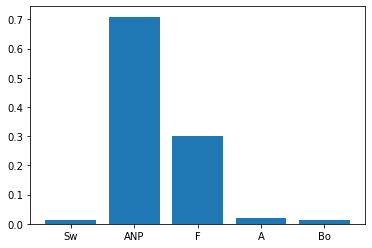

In [43]:
# Graficamos los resultados de la sensibilidad global.
plt.bar(x=["Sw", "ANP","F","A","Bo"], height=sensitivity["ST"])

### **Conclusión:**
El gráfico de barras muestra claramente que la varianza de la variable de salida POES está influenciada de manera dominante por la varianza de la variable de entrada ANP; (75.4% de la varianza del POES es causada por la varianza de la variable ANP).
Si se quisiera reducir la dispersión del POES para disminuir la incertidumbre de un posible plan de explotación, por ejemplo, debería centrarse la atención en las razones de la dispersión o varianza del ANP y ver si esta es reducible de alguna manera o si simplemente está asociada a la heterogeneidad del yacimiento.

Si se quisiera reducir la dispersión del POES para disminuir la incertidumbre de un posible plan de explotación, por ejemplo, debería centrarse la atención en las razones de la dispersión o varianza del ANP y ver si esta es reducible de alguna manera o si simplemente está asociada a la heterogeneidad del yacimiento.

_Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
ruslombia@gmail.com  
Bogotá – Colombia_  